In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

td=pd.read_csv("train.csv")

In [4]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1.Total No.of Passangers:891

# 2.columns/ filds:12

<Axes: xlabel='Survived', ylabel='count'>

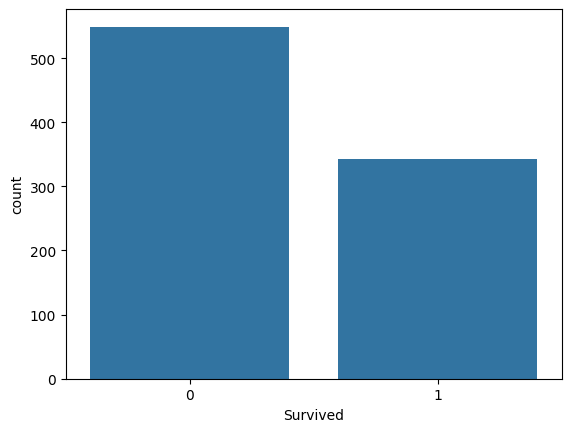

In [6]:
sb.countplot(x="Survived",data=td)

<Axes: xlabel='Pclass', ylabel='count'>

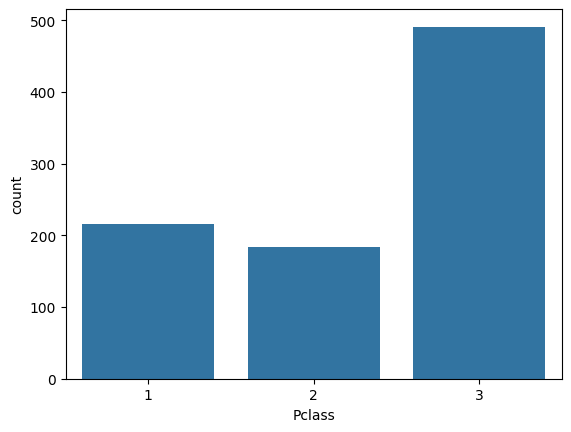

In [7]:
sb.countplot(x="Pclass", data=td)

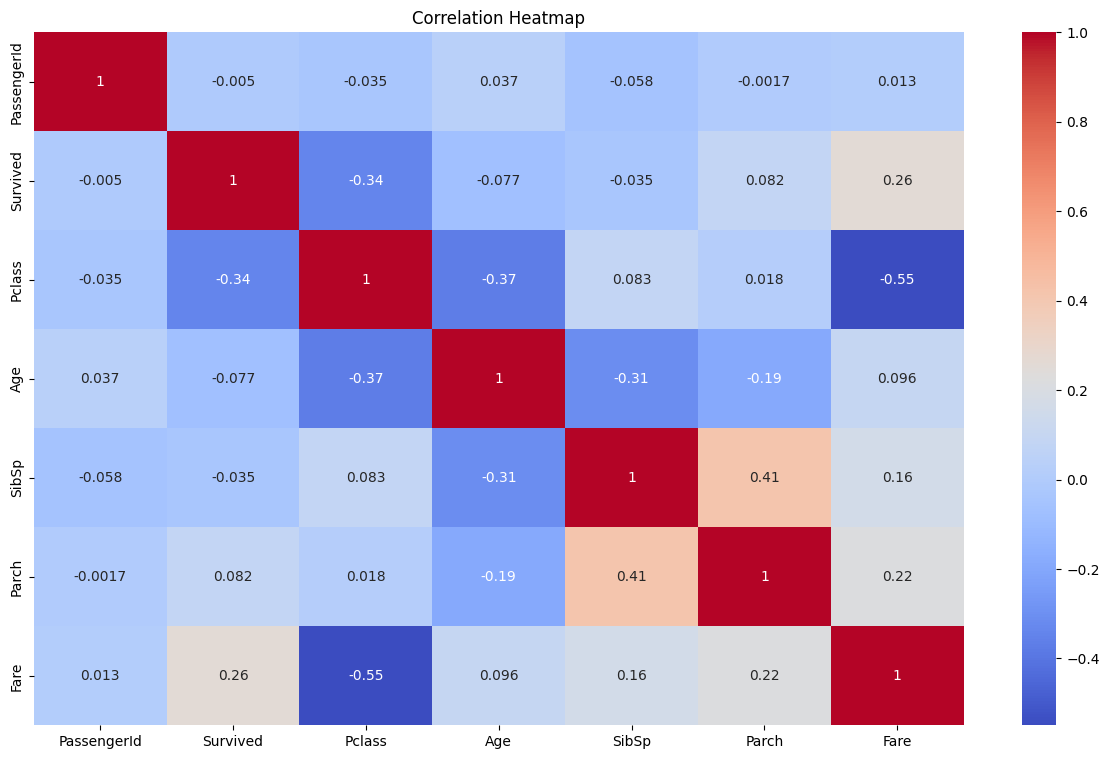

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_td = td.select_dtypes(include=['number'])
corr = numeric_td.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

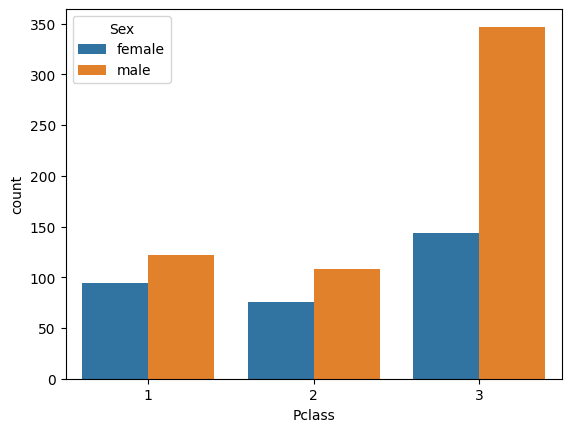

In [159]:
sb.countplot(x="Pclass", hue="Sex",data=td)

<Axes: xlabel='Survived', ylabel='count'>

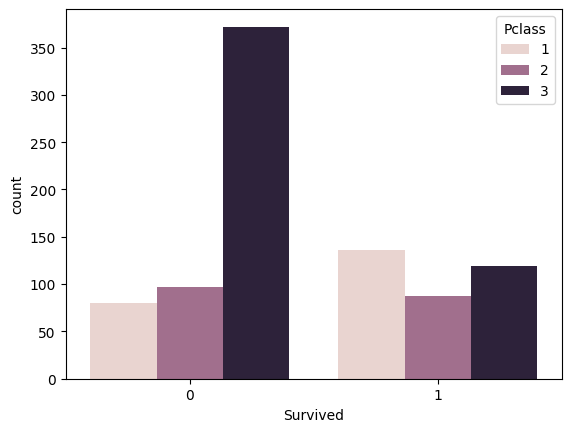

In [160]:
sb.countplot(x="Survived", hue="Pclass",data=td)

<Axes: xlabel='Survived', ylabel='count'>

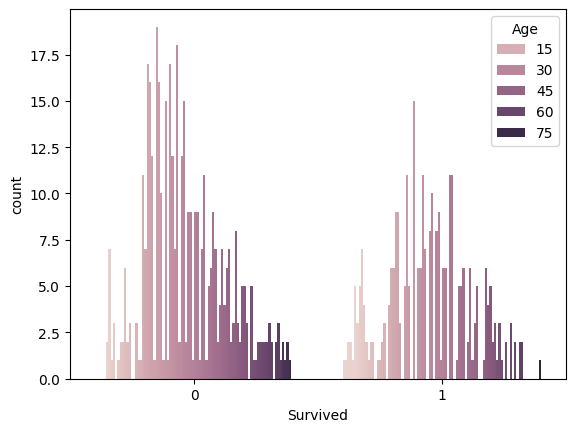

In [161]:
sb.countplot(x="Survived", hue="Age",data=td)

In [162]:
td.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [163]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [164]:
td.dropna(inplace=True)

In [165]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [166]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  183 non-null    bool 
 1   Survived     183 non-null    bool 
 2   Pclass       183 non-null    bool 
 3   Name         183 non-null    bool 
 4   Sex          183 non-null    bool 
 5   Age          183 non-null    bool 
 6   SibSp        183 non-null    bool 
 7   Parch        183 non-null    bool 
 8   Ticket       183 non-null    bool 
 9   Fare         183 non-null    bool 
 10  Cabin        183 non-null    bool 
 11  Embarked     183 non-null    bool 
dtypes: bool(12)
memory usage: 3.6 KB


In [167]:
print(td['Sex'])

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 183, dtype: object


In [168]:
sex=pd.get_dummies(td['Sex'],prefix="Sex")

In [169]:
print(sex)

     Sex_female  Sex_male
1          True     False
3          True     False
6         False      True
10         True     False
11         True     False
..          ...       ...
871        True     False
872       False      True
879        True     False
887        True     False
889       False      True

[183 rows x 2 columns]


In [170]:
print(td['Embarked'])

1      C
3      S
6      S
10     S
11     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 183, dtype: object


In [171]:
emb=pd.get_dummies(td['Embarked'],prefix="Embarked")

In [172]:
print(emb)

     Embarked_C  Embarked_Q  Embarked_S
1          True       False       False
3         False       False        True
6         False       False        True
10        False       False        True
11        False       False        True
..          ...         ...         ...
871       False       False        True
872       False       False        True
879        True       False       False
887       False       False        True
889        True       False       False

[183 rows x 3 columns]


In [173]:
print(td['Pclass'])

1      1
3      1
6      1
10     3
11     1
      ..
871    1
872    1
879    1
887    1
889    1
Name: Pclass, Length: 183, dtype: int64


In [174]:
pcls=pd.get_dummies(td['Pclass'],prefix="Pclass")

In [175]:
print(pcls)

     Pclass_1  Pclass_2  Pclass_3
1        True     False     False
3        True     False     False
6        True     False     False
10      False     False      True
11       True     False     False
..        ...       ...       ...
871      True     False     False
872      True     False     False
879      True     False     False
887      True     False     False
889      True     False     False

[183 rows x 3 columns]


In [176]:
td.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)

In [177]:
td=pd.concat([td,sex,emb,pcls],axis=1)

In [178]:
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Name         183 non-null    object 
 3   Age          183 non-null    float64
 4   SibSp        183 non-null    int64  
 5   Parch        183 non-null    int64  
 6   Ticket       183 non-null    object 
 7   Fare         183 non-null    float64
 8   Cabin        183 non-null    object 
 9   Sex_female   183 non-null    bool   
 10  Sex_male     183 non-null    bool   
 11  Embarked_C   183 non-null    bool   
 12  Embarked_Q   183 non-null    bool   
 13  Embarked_S   183 non-null    bool   
 14  Pclass_1     183 non-null    bool   
 15  Pclass_2     183 non-null    bool   
 16  Pclass_3     183 non-null    bool   
dtypes: bool(8), float64(2), int64(4), object(3)
memory usage: 15.7+ KB
None


In [179]:
td.drop(["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [180]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    183 non-null    int64  
 1   Age         183 non-null    float64
 2   SibSp       183 non-null    int64  
 3   Parch       183 non-null    int64  
 4   Fare        183 non-null    float64
 5   Sex_female  183 non-null    bool   
 6   Sex_male    183 non-null    bool   
 7   Embarked_C  183 non-null    bool   
 8   Embarked_Q  183 non-null    bool   
 9   Embarked_S  183 non-null    bool   
 10  Pclass_1    183 non-null    bool   
 11  Pclass_2    183 non-null    bool   
 12  Pclass_3    183 non-null    bool   
dtypes: bool(8), float64(2), int64(3)
memory usage: 10.0 KB


In [181]:
td.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
3,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
6,0,54.0,0,0,51.8625,False,True,False,False,True,True,False,False
10,1,4.0,1,1,16.7000,True,False,False,False,True,False,False,True
11,1,58.0,0,0,26.5500,True,False,False,False,True,True,False,False


In [182]:
X=td.drop(["Survived"],axis=1)

In [183]:
print(X)

      Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
1    38.0      1      0  71.2833        True     False        True   
3    35.0      1      0  53.1000        True     False       False   
6    54.0      0      0  51.8625       False      True       False   
10    4.0      1      1  16.7000        True     False       False   
11   58.0      0      0  26.5500        True     False       False   
..    ...    ...    ...      ...         ...       ...         ...   
871  47.0      1      1  52.5542        True     False       False   
872  33.0      0      0   5.0000       False      True       False   
879  56.0      0      1  83.1583        True     False        True   
887  19.0      0      0  30.0000        True     False       False   
889  26.0      0      0  30.0000       False      True        True   

     Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
1         False       False      True     False     False  
3         False        True      True  

In [184]:
y=td["Survived"]

In [185]:
print(y)

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64


In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [188]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 356 to 218
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         128 non-null    float64
 1   SibSp       128 non-null    int64  
 2   Parch       128 non-null    int64  
 3   Fare        128 non-null    float64
 4   Sex_female  128 non-null    bool   
 5   Sex_male    128 non-null    bool   
 6   Embarked_C  128 non-null    bool   
 7   Embarked_Q  128 non-null    bool   
 8   Embarked_S  128 non-null    bool   
 9   Pclass_1    128 non-null    bool   
 10  Pclass_2    128 non-null    bool   
 11  Pclass_3    128 non-null    bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 6.0 KB


In [189]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 297 to 645
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         55 non-null     float64
 1   SibSp       55 non-null     int64  
 2   Parch       55 non-null     int64  
 3   Fare        55 non-null     float64
 4   Sex_female  55 non-null     bool   
 5   Sex_male    55 non-null     bool   
 6   Embarked_C  55 non-null     bool   
 7   Embarked_Q  55 non-null     bool   
 8   Embarked_S  55 non-null     bool   
 9   Pclass_1    55 non-null     bool   
 10  Pclass_2    55 non-null     bool   
 11  Pclass_3    55 non-null     bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 2.6 KB


In [190]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 128 entries, 356 to 218
Series name: Survived
Non-Null Count  Dtype
--------------  -----
128 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


In [191]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 55 entries, 297 to 645
Series name: Survived
Non-Null Count  Dtype
--------------  -----
55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
lm=LogisticRegression(max_iter=10000)

In [194]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [195]:
Predections=lm.predict(X_test)

In [196]:
from sklearn.metrics import classification_report

In [197]:
print(classification_report(y_test,Predections))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55        17
           1       0.79      0.82      0.81        38

    accuracy                           0.73        55
   macro avg       0.68      0.67      0.68        55
weighted avg       0.72      0.73      0.72        55



In [198]:
from sklearn.metrics import confusion_matrix

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
print(confusion_matrix(y_test,Predections))

[[ 9  8]
 [ 7 31]]


In [201]:
from sklearn.metrics import accuracy_score

In [202]:
print(accuracy_score(y_test,Predections))

0.7272727272727273


In [203]:
#import pickle

In [204]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [205]:
# save the model to disk
#with open('Titanic','wb') as f:
   # pickle.dump(td,f)

In [206]:
td['Age'] = td['Age'].fillna(td['Age'].median())  

In [207]:
td.fillna(td.median(), inplace=True)

if 'Sex' in td.columns:
    td['Sex'] = td['Sex'].map({'male': 1, 'female': 0})
if 'Embarked' in td.columns:
    td['Embarked'] = td['Embarked'].map({'C': 1, 'Q': 2, 'S': 3}).fillna(3)

features = [col for col in ['Pclass', 'Age', 'Fare', 'Sex', 'Embarked'] if col in td.columns]

X = td[features]
y = td['Survived']

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42).fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.7454545454545455


In [210]:
print(td.columns)

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'FamilySize', 'IsAlone'],
      dtype='object')


In [211]:
td.fillna(td.median(), inplace=True)

features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'Fare', 
            'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 
            'FamilySize', 'IsAlone']

X = td[features]
y = td['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7454545454545455


In [216]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


td.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True, errors="ignore")


if 'Age' in td.columns:
    td.loc[:, 'Age'] = td['Age'].fillna(td['Age'].median())

if 'Embarked' in td.columns:
    td.loc[:, 'Embarked'] = td['Embarked'].fillna(td['Embarked'].mode()[0])

if 'Fare' in td.columns:
    td.loc[:, 'Fare'] = td['Fare'].fillna(td['Fare'].median())


if {'SibSp', 'Parch'}.issubset(td.columns):
    td['FamilySize'] = td['SibSp'] + td['Parch'] + 1
    td['IsAlone'] = (td['FamilySize'] == 1).astype(int)

if 'Fare' in td.columns:
    td['FareBins'] = pd.qcut(td['Fare'], 4, labels=False)


if 'Sex' in td.columns:
    td['Sex'] = LabelEncoder().fit_transform(td['Sex'])

if 'Embarked' in td.columns:
    td = pd.get_dummies(td, columns=['Embarked'], drop_first=True)


td.drop(columns=['SibSp', 'Parch', 'Fare'], inplace=True, errors="ignore")


if 'Survived' in td.columns:
    X = td.drop("Survived", axis=1)
    y = td["Survived"]
else:
    raise KeyError("Column 'Survived' not found in dataset")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numeric_features = ['Age', 'FamilySize']
for feature in numeric_features:
    if feature in X_train.columns:
        X_train[feature] = scaler.fit_transform(X_train[[feature]])
        X_test[feature] = scaler.transform(X_test[[feature]])

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Model Accuracy: {accuracy:.2f}")


Improved Model Accuracy: 0.73


In [218]:

td = pd.read_csv("train.csv")

td.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True, errors="ignore")

td.loc[:, 'Age'] = td['Age'].fillna(td['Age'].median())
td.loc[:, 'Embarked'] = td['Embarked'].fillna(td['Embarked'].mode()[0])
td.loc[:, 'Fare'] = td['Fare'].fillna(td['Fare'].median())

td['FamilySize'] = td['SibSp'] + td['Parch'] + 1
td['IsAlone'] = (td['FamilySize'] == 1).astype(int)
td['FareBins'] = pd.qcut(td['Fare'], 4, labels=False)

td['Sex'] = LabelEncoder().fit_transform(td['Sex'])
td = pd.get_dummies(td, columns=['Embarked'], drop_first=True)

td.drop(columns=['SibSp', 'Parch', 'Fare'], inplace=True)

X = td.drop("Survived", axis=1)
y = td["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[['Age', 'FamilySize']] = scaler.fit_transform(X_train[['Age', 'FamilySize']])
X_test[['Age', 'FamilySize']] = scaler.transform(X_test[['Age', 'FamilySize']])

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Model Accuracy: {accuracy:.2f}")

Improved Model Accuracy: 0.82
